In [9]:
%matplotlib inline
import pandas as pd
import scipy
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib
#https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
matplotlib.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('./data/Elite_Long_Range_Passenger.csv')

pd.options.display.float_format = '{:,.2f}'.format

print(df.describe())

             Credits  Range in LY  Credits per LY
count         103.00       103.00          103.00
mean   25,144,993.65    13,088.09        2,085.76
std    21,985,675.39     9,459.43          989.51
min     1,336,000.00     1,099.00          404.79
25%     6,132,630.00     2,765.00        1,200.00
50%    18,400,800.00    14,041.00        2,110.39
75%    38,387,040.00    21,031.00        2,833.12
max   104,133,120.00    30,444.00        4,800.00


## The following is an analysis of 103 long range passenger missions in Elite Dangerous.  A long range mission is one that gives a single location to fly to and that is 1000 LY or farther.  Data was gathered in Elite Dangerous v2.2 primarily in systems around Nanomam.

Correlation between credits and LY range:
('r = ', 0.81969690520417304, ' p = ', '0.00000000000000000000')


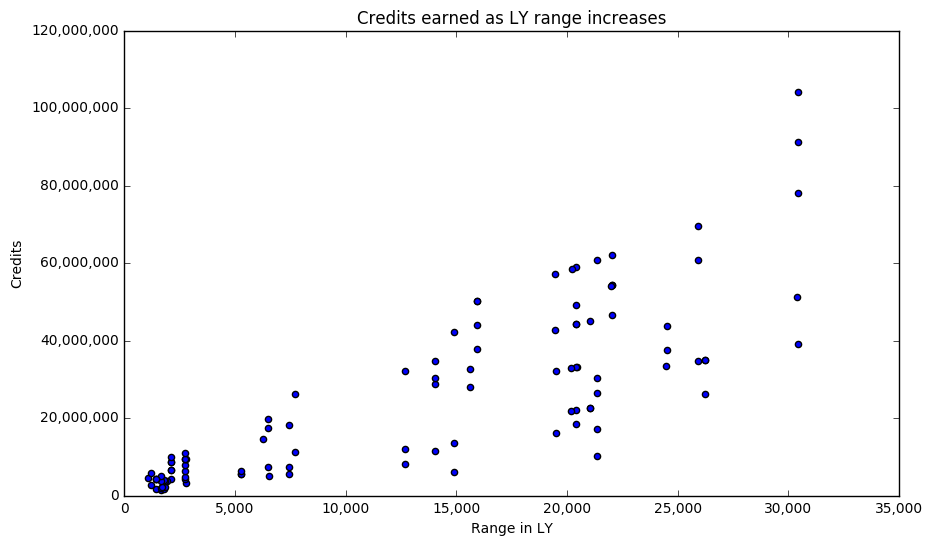

In [10]:
r, p = pearsonr(df['Credits'], df['Range in LY'])
print("Correlation between credits and LY range:")
print("r = ", r, " p = ", '{:.20f}'.format(p))

df.plot(kind='scatter', x='Range in LY', y='Credits', title='Credits earned as LY range increases')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_xlim(0, None)
ax.set_ylim(0, None)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)

## There is unsurprisingly a positive correlation between credits and range in LY, r(101) = 0.81, p < 0.01.

Correlation between credit ratio and LY range:
('r = ', -0.23234056125008976, ' p = ', '0.01819447287755191281')


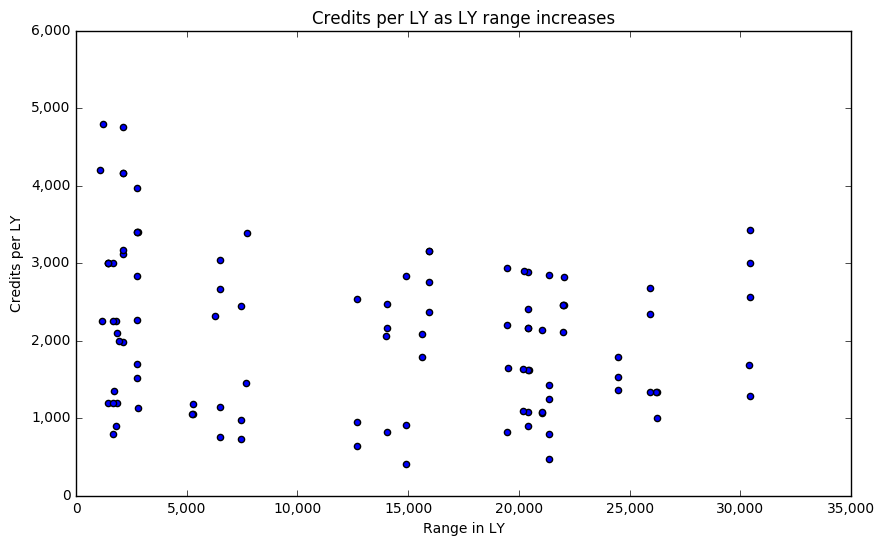

In [11]:
r, p = pearsonr(df['Range in LY'], df['Credits per LY'])
print("Correlation between credit ratio and LY range:")
print("r = ", r, " p = ", '{:.20f}'.format(p))

df.plot(kind='scatter', x='Range in LY', y='Credits per LY', title='Credits per LY as LY range increases')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_xlim(0, None)
ax.set_ylim(0, None)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)

## There is a slight negative correlation between credits per LY and range in LY, r(101) = -0.23, p < 0.05.  Presumably this was done because the developers assume users will be combining long range passenger credits earned with exploration payouts.  As the distance increases as part of the passenger mission, this can be enhanced with substantial credits from exploration data.

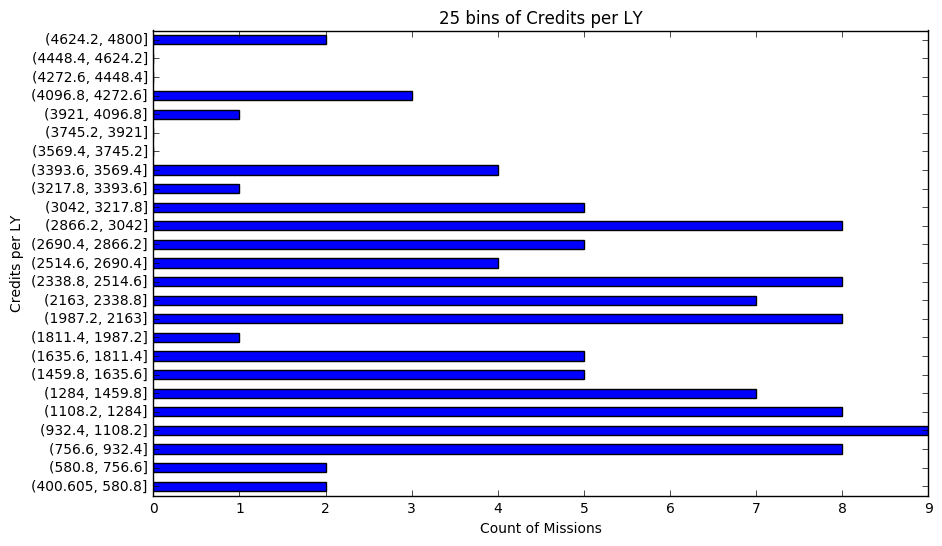

In [12]:
#https://stackoverflow.com/questions/27157522/pandas-plot-histogram-data-frame-index
df['bucket'] = pd.cut(df['Credits per LY'].round(0), bins=25)
newdf = df[['bucket','Credits per LY']].groupby('bucket').size()
newdf.plot(kind='barh', title='25 bins of Credits per LY') #barh - horizontal barplot
ax = plt.gca()
ax.set_ylabel('Credits per LY')
ax.set_xlabel('Count of Missions')

## There are a wide variety of payouts in terms of credits per LY traveled.  If you can find a mission that is close to or over 4000 credits per LY, grab it.  Fly safe cmdr.  o7